### Student Information
Name:陳文斌

Student ID:114062572

GitHub ID:rampageben

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np


## 2. Data Preparation

In [2]:
# read data
df = pd.read_csv("newdataset\Reddit-stock-sentiment.csv")

# categories
categories = ["text", "label"]
df = df[categories]

### **>>> Exercise 1 **

In [3]:
#print 3 examples
for i in range(3):
    print(f"Example {i+1}")
    print("Text:")
    print(df.iloc[i]["text"])       
    print("Label:", df.iloc[i]["label"])  
    print() 

Example 1
Text:
Calls on retards
Label: -1.0

Example 2
Text:
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Label: 0.0

Example 3
Text:
Seeing lots of red in the ticker.
Label: 0.0



## 3. Data Transformation

In [4]:
len(df)

847

In [5]:
df[0:2]

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0


### Adding Columns

In [6]:
# Mapping of numerical labels to text labels
label_map = {
    1.0: "Positive",
    0.0: "Neutral",
   -1.0: "Negative"
}

# add category to the dataframe
df["label_name"] = df["label"].apply(lambda x: label_map.get(x, "Unknown"))


In [7]:
df[0:10]

,text,label,label_name
0,Calls on retards,-1.0,Negative
1,Stunt as in like why did they even make a big ...,0.0,Neutral
2,Seeing lots of red in the ticker.,0.0,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive
4,He didn’t say thank you.,-1.0,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,Neutral
6,Trump will respond to china increasing their t...,-1.0,Negative
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral
8,Am I the only one seeing the cup & handle brea...,1.0,Positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,Positive


### 3.2 Familiarizing yourself with the Data

In [8]:
# a simple query
df[:10][["text","label_name"]]

,text,label_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",Neutral
6,Trump will respond to china increasing their t...,Negative
7,Confirmed not a trap. Its been like this for p...,Neutral
8,Am I the only one seeing the cup & handle brea...,Positive
9,HLGN is $10. Hurry and catch it now before it ...,Positive


In [9]:
# using loc (by label)
df.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [10]:
# using iloc (by position)
df.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

### **>>> Exercise 2 :** 

In [11]:
df[df['label'] == -1][0:3] # find the first 3 documents in category 1

,text,label,label_name
0,Calls on retards,-1.0,Negative
4,He didn’t say thank you.,-1.0,Negative
6,Trump will respond to china increasing their t...,-1.0,Negative


### **>>> Exercise 3 :**  


In [12]:
df[df["label_name"] == "Neutral"][::10][0:5]

,text,label,label_name
1,Stunt as in like why did they even make a big ...,0.0,Neutral
22,"Google ""target dei"".\r\n\r\nI did it for you.\...",0.0,Neutral
40,These China AI factory memes are pretty good. ...,0.0,Neutral
55,The steal,0.0,Neutral
72,"A lot of stocks are down right now, and I'm th...",0.0,Neutral


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [13]:
# check missing values
df.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [14]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 :** 

In [15]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [16]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])

In [17]:
dummy_series

text     dummy_record
label               1
dtype: object

In [18]:
dummy_series.to_frame().T

,text,label
0,dummy_record,1


In [19]:
df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

In [20]:
len(df)

848

In [21]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [24]:
len(df)

847

### >>> **Exercise 5** 

In [25]:
#extra examples of missing values
NA_dict2 = [
    {"id": "G", "missing_example": pd.NA},           
    {"id": "H", "missing_example": "NULL"},          
    {"id": "I", "missing_example": " "},             
    {"id": "J", "missing_example": np.inf},          
    {"id": "K", "missing_example": -np.inf},         
]
NA_df2 = pd.DataFrame(NA_dict2, columns = ['id','missing_example'])
NA_df2

,id,missing_example
0,G,<NA>
1,H,NULL
2,I,
3,J,inf
4,K,-inf


In [26]:
NA_df2['missing_example'].isnull()

0     True
1    False
2    False
3    False
4    False
Name: missing_example, dtype: bool

In [27]:
# Answer here
# G is null because it is null in pandas
# H is not null because it is a string "NULL"
# I is not null because it is a string with a space
# J is not null because it is infinity
# K is not null because it is negative infinity

### 4.2 Dealing with Duplicate Data

In [28]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [29]:
sum(df.duplicated())

23

In [30]:
df.drop_duplicates(keep=False, inplace=True)

In [31]:
len(df)

813

## 5.  Data Preprocessing

### 5.1 Sampling

In [32]:
df_sample = df.sample(n=100) #random state

In [33]:
len(df_sample)

100

In [34]:
df_sample[0:5]

,text,label,label_name
33,Pls respond,0.0,Neutral
529,AERC super low float could rip any day now,0.0,Neutral
599,"Yes, Trump and everyone who voted for him are ...",0.0,Neutral
635,"To be fair - Jerome Powell ""inflation is tran...",0.0,Neutral
7,Confirmed not a trap. Its been like this for p...,0.0,Neutral


### >>> Exercise 6:

In [35]:
# size is changing because of the random sampling
print(len(df))
print(len(df_sample))
# sample index is not continuous because of random sampling
print(df_sample.index[0:10])
# sample order is not the same as original dataframe because of random sampling
print(df_sample.iloc[0:10, 0])
print(df.iloc[0:10, 0])

813
100
Index([33, 529, 599, 635, 7, 198, 624, 798, 94, 797], dtype='int64')
33                                           Pls respond
529           AERC super low float could rip any day now
599    Yes, Trump and everyone who voted for him are ...
635    To be fair  - Jerome Powell "inflation is tran...
7      Confirmed not a trap. Its been like this for p...
198                 Criminals belong in jail, or better.
624    But have you also seen the one that made milli...
798                                                    /
94               I can’t take four years of lying. Help!
797    I currently own \r\n\r\n* TSLA\r\n* FB\r\n* BA...
Name: text, dtype: object
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, .

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
categories

['text', 'label']

label_name
Neutral     391
Negative    315
Positive    107
Name: count, dtype: int64


<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

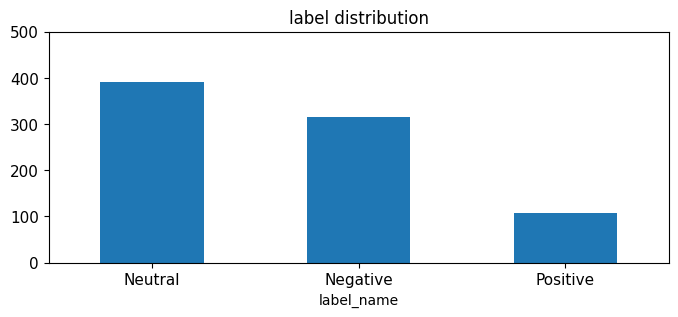

In [38]:
print(df.label_name.value_counts())

# plot barchart for X
df.label_name.value_counts().plot(kind = 'bar',
                                    title = 'label distribution',
                                    ylim = [0, 500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_name
Neutral     47
Negative    39
Positive    14
Name: count, dtype: int64


<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

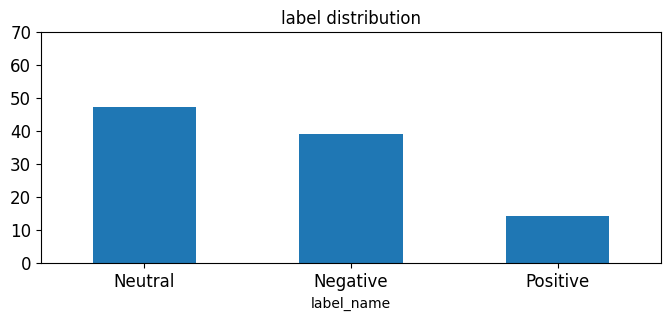

In [39]:
print(df_sample.label_name.value_counts())

# plot barchart for X_sample
df_sample.label_name.value_counts().plot(kind = 'bar',
                                           title = 'label distribution',
                                           ylim = [0, 70], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7:**

<Axes: title={'center': 'label distribution'}, xlabel='label_name'>

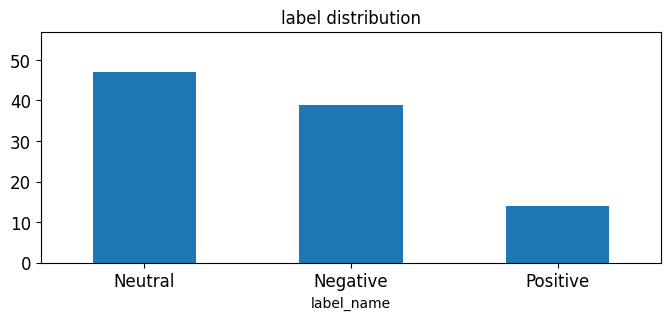

In [40]:
# Answer here
df_sample.label_name.value_counts().plot(kind = 'bar',
                                             title = 'label distribution',
                                             ylim = [0, df_sample.label_name.value_counts().max() + 10], 
                                             rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8:** 

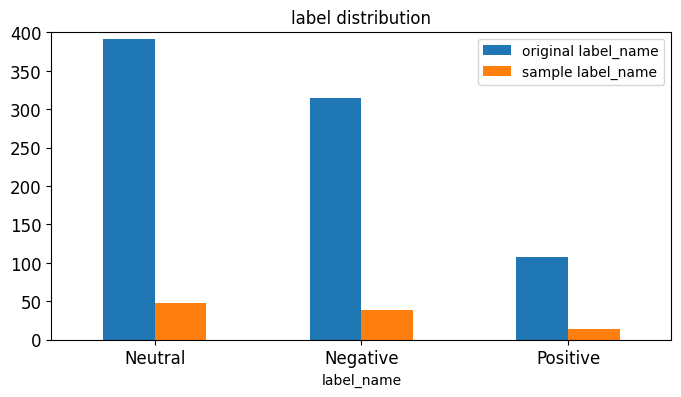

In [41]:
org = df.label_name.value_counts().rename("original label_name")
sample = df_sample.label_name.value_counts().rename("sample label_name")
new_df = pd.concat([org, sample], axis=1)

new_df.plot(kind = 'bar',
        title = 'label distribution',
        ylim = [0, org.max() + 10], 
        rot = 0, fontsize = 12, figsize = (8,4))
plt.show()

### 5.2 Feature Creation

In [42]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adam1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adam1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# takes a like a minute or two to process

df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

In [45]:
df[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [46]:
df[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [47]:
list(df[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

### 5.3 Feature subset selection

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [56]:
count_vect.get_feature_names_out()[689]

'calls'

In [57]:
count_vect.get_feature_names_out()[2682]

'on'

In [58]:
count_vect.get_feature_names_out()[3220]

'retards'

In [59]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9:**

In [60]:
analyze(df.text[0])

['calls', 'on', 'retards']

In [61]:
df_counts.shape

(813, 4313)

In [62]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [63]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [64]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10:**

In [65]:
index = df_counts[4].nonzero()[1]
print(count_vect.get_feature_names_out()[index[1]])

didn


In [66]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [68]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [69]:
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

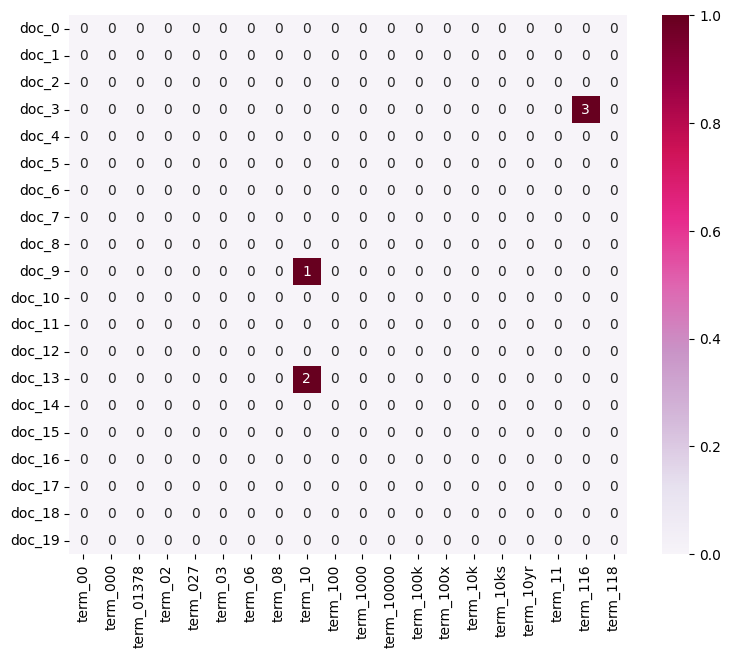

In [70]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11:** 

<Axes: >

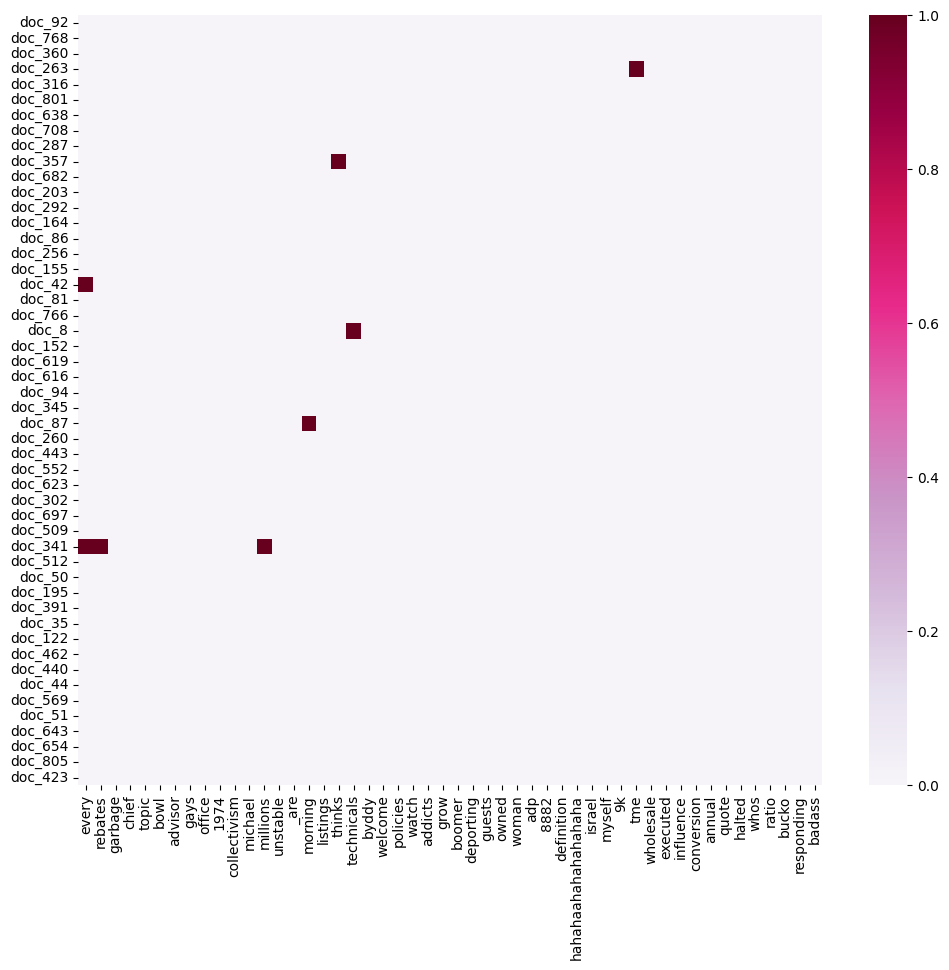

In [72]:
sample_docs = np.random.choice(df_counts.shape[0], 50, replace=False)
sample_terms = np.random.choice(df_counts.shape[1], 50, replace=False)
df_todraw = pd.DataFrame(
    df_counts[sample_docs][:, sample_terms].toarray(),
    index=[f"doc_{i}" for i in sample_docs],
    columns=[count_vect.get_feature_names_out()[j] for j in sample_terms]
)

plt.figure(figsize=(12,10))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=df_todraw.values.max(), annot=False)

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [73]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [74]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [75]:
term_frequencies[0]

np.int64(4)

C:\Users\adam1\AppData\Local\Temp\ipykernel_18912\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

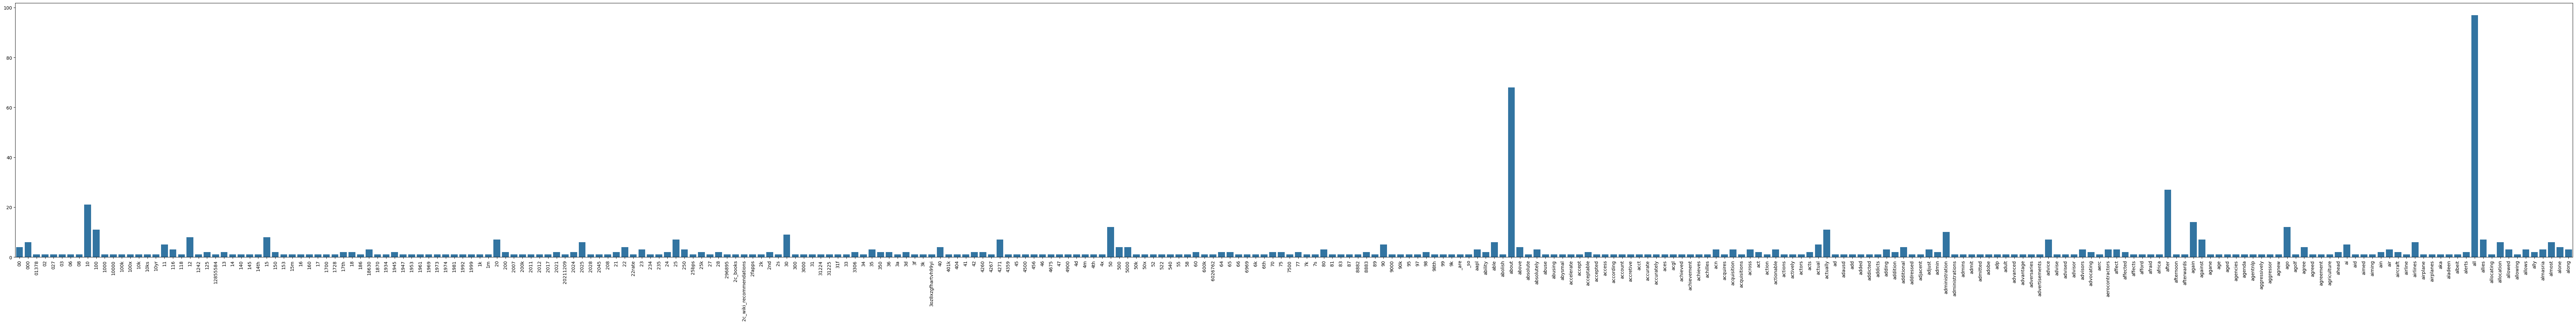

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 12:**

In [77]:
import plotly.express as px
fig = px.bar(x = count_vect.get_feature_names_out()[:300], 
             y = term_frequencies[:300], 
             title = "Top 50 Terms Frequency",
             labels = {"x": "Term", "y": "Frequency"})

fig.update_layout(xaxis_tickangle = 90, width = 1200, height = 500)

fig.show()

### >>> **Exercise 13:** 

In [79]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

fig = px.bar(df_terms.sample(n = 50, random_state=42), x = "term", y = "frequency",
             title = "Sampple 50 Terms Frequency")

fig.show()


### >>> **Exercise 14:** 

In [80]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by = "frequency", ascending = False)

df_top = df_terms.head(50)

fig = px.bar(df_top, x = "term", y = "frequency",
             title = "Top 50 Terms Frequency")

fig.show()

In [81]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\adam1\AppData\Local\Temp\ipykernel_18912\619071606.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

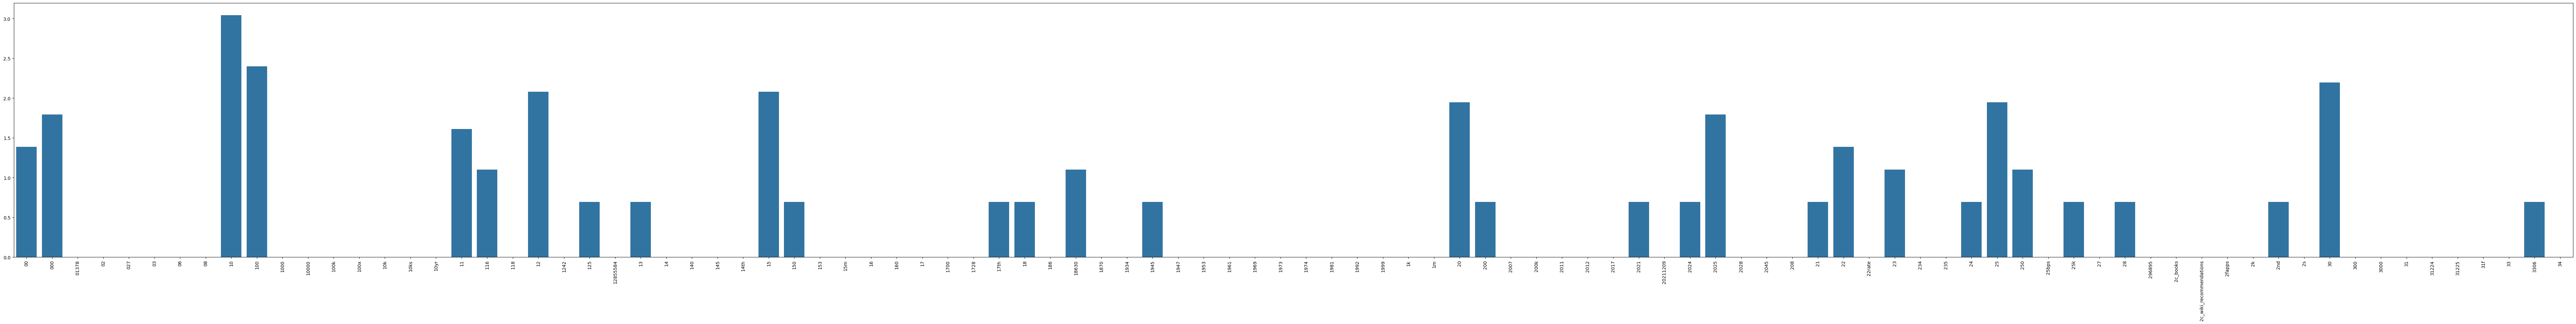

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90)

### >>> **Exercise 15:** 

In [85]:
df_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies_log
}).sort_values(by = "frequency", ascending = False)

df_top = df_terms.head(50)

fig = px.bar(df_top, x = "term", y = "frequency",
             title = "Top 50 Terms Frequency Log Scale")

fig.show()

End of Phase 1

# Phase 2

In [44]:
### Begin Assignment Here